# Fingerprint distances distribution

In this notebook, we investigate the ranges of fingerprint distances for different feature weighting schemes.
Feature weighting schemes are denoted as follows: 

_\<physicochemical\>\<distances\>\<moments\>_

- $100$: Include only bits for physicochemical features (_physicochemical_)
- $010$: Include only bits for spatial distances features (_distances_)
- $001$: Include only bits for moments of spatial distances features (_moments_)
- $110$: Include only bits for physicochemical and distances (1:1)
- $101$: Include only bits for physicochemical and moments (1:1)
- $011$: Include only bits for distances and moments (1:1)
- $111$: Include all bits equally weighted by physicochemical, distances, and moments
- $15$: Include all bits equally by bit

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

from kissim.comparison import FingerprintDistanceGenerator

In [3]:
HERE = Path(_dh[-1])  # noqa: F821
DATA = HERE / "../../results/"

In [4]:
plt.style.use("seaborn")

In [5]:
%%time

weights = ["100", "101", "001", "110", "101", "011", "111", "15"]
distances = {}
for weight in weights:
    file = f"fingerprint_distances_{weight}.csv"
    fingerprint_distance_generator = FingerprintDistanceGenerator.from_csv(DATA / file)
    dist_df = fingerprint_distance_generator.data
    print(f"{file} - Number of comparisons: {len(dist_df)}")
    distances[weight] = dist_df["distance"]

fingerprint_distances_100.csv - Number of comparisons: 12081070
fingerprint_distances_101.csv - Number of comparisons: 12081070
fingerprint_distances_001.csv - Number of comparisons: 12081070
fingerprint_distances_110.csv - Number of comparisons: 12081070
fingerprint_distances_101.csv - Number of comparisons: 12081070
fingerprint_distances_011.csv - Number of comparisons: 12081070
fingerprint_distances_111.csv - Number of comparisons: 12081070
fingerprint_distances_15.csv - Number of comparisons: 12081070
CPU times: user 45.2 s, sys: 4.79 s, total: 50 s
Wall time: 52.1 s


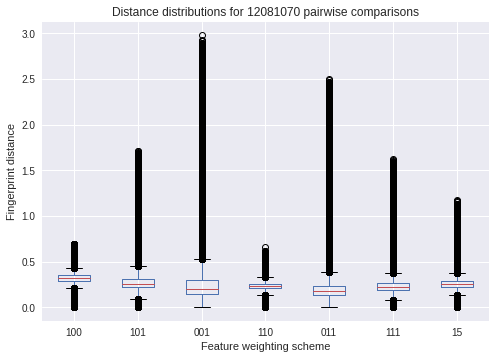

In [6]:
fig, ax = plt.subplots(1, 1)
pd.DataFrame(distances).plot(
    kind="box",
    ax=ax,
    title=f"Distance distributions for {distances['111'].shape[0]} pairwise comparisons",
)
ax.set_xlabel("Feature weighting scheme")
ax.set_ylabel("Fingerprint distance");